In [1]:
import pandas as pd

# Step 1: Load the dataset
# Replace 'Employee_Attrition.csv' with the path to your dataset file
dataset_path = 'Employee_Attrition.csv'
df = pd.read_csv(dataset_path)

In [2]:
# Step 2: Display the first few rows to understand the structure of the data
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHour

In [3]:
# Step 3: Display basic information about the dataset
print("\nDataset Information:")
df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Jo

In [4]:
# Step 4: Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values[missing_values > 0])


Missing Values in Each Column:
Series([], dtype: int64)


In [5]:
# Step 5: Analyze the target variable 'Attrition'
print("\nTarget Variable Distribution:")
print(df['Attrition'].value_counts())


Target Variable Distribution:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


In [6]:
# Step 6: Analyze numerical features with descriptive statistics
print("\nNumerical Features Summary:")
print(df.describe())


Numerical Features Summary:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std 

In [7]:
# Step 7: Analyze categorical features
categorical_features = df.select_dtypes(include=['object']).columns
print("\nCategorical Features and Their Unique Values:")
for feature in categorical_features:
    print(f"{feature}: {df[feature].nunique()} unique values")
    print(df[feature].value_counts().head(), "\n")


Categorical Features and Their Unique Values:
Attrition: 2 unique values
Attrition
No     1233
Yes     237
Name: count, dtype: int64 

BusinessTravel: 3 unique values
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64 

Department: 3 unique values
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64 

EducationField: 6 unique values
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Name: count, dtype: int64 

Gender: 2 unique values
Gender
Male      882
Female    588
Name: count, dtype: int64 

JobRole: 9 unique values
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Name: count, dtype: int64 

MaritalStatus: 3 unique values
MaritalStatus
M


---
#### Numerical Features Analysis
#### 1. **Constant or Near-Constant Columns**:
   - **Why**: Columns with constant or near-constant values do not provide meaningful information for predictions.
   - **Columns Identified**:
     - `StandardHours`: Constant value of 80 for all rows.
     - `EmployeeCount`: Constant value of 1 for all rows.
     - `Over18`: Single value `Y` for all rows.
   - **Action**: Drop these columns as they add no predictive power.

---
#### 2. **Potentially Important Features**:
   - **Why**: Columns with high variability may significantly impact attrition predictions.
   - **Examples**:
     - `EnvironmentSatisfaction`: Variability suggests it could influence job satisfaction and attrition.
     - `WorkLifeBalance`: Likely a key factor in understanding attrition risks.
     - `YearsAtCompany` and `YearsWithCurrManager`: These columns likely correlate with employee loyalty and attrition.
   - **Action**: Retain these columns for feature selection.

---

### Categorical Features Analysis

#### 1. **Constant or Near-Constant Categorical Columns**:
   - **Why**: Features with little to no variability provide no additional information.
   - **Columns Identified**:
     - `Over18`: Single value `Y` for all rows.
   - **Action**: Drop these columns.

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

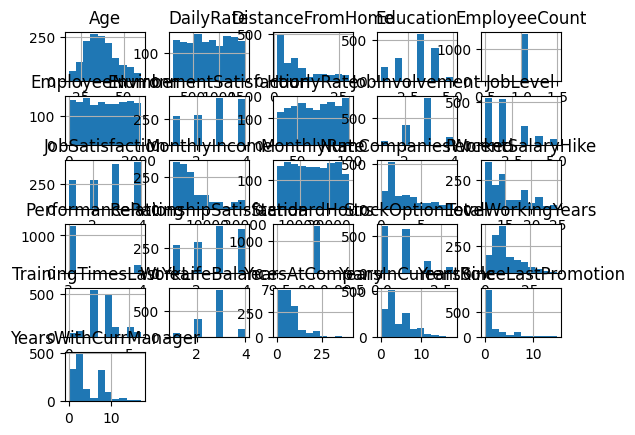

In [8]:
df.hist()

In [9]:
# List of columns to drop
columns_to_drop = ['StandardHours', 'EmployeeCount', 'Over18']

# Dropping the columns
df_cleaned = df.drop(columns=columns_to_drop, axis=1)

# Display the remaining columns
print("Remaining columns after dropping constant columns:")
print(df_cleaned.columns)

Remaining columns after dropping constant columns:
Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [10]:
# Retaining potentially important features 
important_numerical_features = ['EnvironmentSatisfaction', 'WorkLifeBalance', 'YearsAtCompany', 'YearsWithCurrManager']
df_important_features = df_cleaned[important_numerical_features]

In [11]:
df_cleaned

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


#### 1. Separate Encoding:
#### What it Does: Encodes nominal and ordinal columns using different methods.
#### Ordinal Columns: Use LabelEncoder to preserve the order of categories.
#### Nominal Columns: Use OneHotEncoder to avoid implying an order where none exists.
#### Advantages:
#### Maintains the integrity of ordinal relationships.
#### Avoids introducing bias by wrongly implying order in nominal variables.

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify nominal and ordinal columns
nominal_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'Gender']
binary_columns = ['Attrition', 'OverTime']  # Binary columns that need label encoding

# Step 2: Apply One-Hot Encoding for Nominal Columns
df_cleaned = pd.get_dummies(df_cleaned, columns=nominal_columns, drop_first=True)

# Step 3: Apply Label Encoding for Binary Columns (e.g., Attrition, OverTime)
label_encoders = {}

for col in binary_columns:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col])
    label_encoders[col] = le

# Step 4: Verify the Label Encoding
print("\nLabel Encoded Columns:")
for col in binary_columns:
    print(f"{col}: {dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)))}")

# Step 5: Check the updated dataset
print("\nEncoded Dataset Head:")
print(df_cleaned.head())



Label Encoded Columns:
Attrition: {'No': 0, 'Yes': 1}
OverTime: {'No': 0, 'Yes': 1}

Encoded Dataset Head:
   Age  Attrition  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0   41          1       1102                 1          2               1   
1   49          0        279                 8          1               2   
2   37          1       1373                 2          2               4   
3   33          0       1392                 3          4               5   
4   27          0        591                 2          1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1

In [13]:
from sklearn.preprocessing import StandardScaler

# Step 1: Identify numerical columns
numerical_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 
                     'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 
                     'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
                     'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 
                     'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 
                     'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 
                     'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Step 2: Apply StandardScaler
scaler = StandardScaler()

df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# Step 3: Verify the scaled features
print("\nScaled Numerical Features:")
print(df_cleaned[numerical_columns].head())



Scaled Numerical Features:
        Age  DailyRate  DistanceFromHome  Education  EmployeeNumber  \
0  0.446350   0.742527         -1.010909  -0.891688       -1.701283   
1  1.322365  -1.297775         -0.147150  -1.868426       -1.699621   
2  0.008343   1.414363         -0.887515  -0.891688       -1.696298   
3 -0.429664   1.461466         -0.764121   1.061787       -1.694636   
4 -1.086676  -0.524295         -0.887515  -1.868426       -1.691313   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                -0.660531    1.383138        0.379672 -0.057788   
1                 0.254625   -0.240677       -1.026167 -0.057788   
2                 1.169781    1.284725       -1.026167 -0.961486   
3                 1.169781   -0.486709        0.379672 -0.961486   
4                -1.575686   -1.274014        0.379672 -0.961486   

   JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
0         1.153254  ...          -0.426230                 -1.58

The choice of 5 generations and a population size of 20 in the TPOT initialization is a trade-off between computation time and optimization performance.

Why 5 Generations and Population Size of 20?
Generations:

In TPOT, the number of generations refers to how many times the population of candidate models will evolve.
Each generation refines the model by exploring different combinations of algorithms and hyperparameters. TPOT tries to improve the model over multiple generations using techniques like genetic algorithms.
5 generations is often a good starting point to allow TPOT to explore enough model configurations and combinations.
More generations (e.g., 50, 100) would allow TPOT to explore more configurations, but they would also increase the computation time significantly.
5 generations strikes a balance between exploration and computational cost, especially when you're starting or working with smaller datasets or fewer resources.
Population Size:

The population size defines the number of candidate models considered in each generation.
20 models per generation is a reasonable starting point for balancing model exploration and computational time.
A larger population size (e.g., 50 or 100) would mean exploring more models per generation, but also requires more time and computing power.
A smaller population size (e.g., 10) reduces the computation but might limit the diversity of models, potentially resulting in suboptimal performance.
Why These Values Are Used?
Computational Cost: Each generation and population size results in training multiple models. For example:

5 generations × 20 models = 100 models to evaluate.
This is a reasonable amount of work to perform, especially for smaller datasets or when quick exploration is needed.
Larger datasets or more complex problems may require more generations and larger populations for better optimization.
Balance Between Time and Performance:

If you're looking for quick results with a decent model, this combination (5 generations and 20 population size) will likely give you a good starting point without being computationally expensive.
For better performance, especially in larger datasets or more complex problems, you can experiment with higher values for generations and population size (e.g., 50 generations and 50 population size).


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

# Step 1: Split the dataset into training (80%) and testing (20%) sets
X = df_cleaned.drop(columns=['Attrition'])  # Features (remove the target variable)
y = df_cleaned['Attrition']  # Target variable

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: AutoML using TPOT
# Initialize the TPOTClassifier with 5 generations and a population size of 20
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)

# Fit the model on the training data
tpot.fit(X_train, y_train)

# Step 3: Evaluate the model on the test data
print("\nTest Accuracy: ", tpot.score(X_test, y_test))


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8631085467003246

Generation 2 - Current best internal CV score: 0.8631085467003246

Generation 3 - Current best internal CV score: 0.8631085467003246

Generation 4 - Current best internal CV score: 0.8741687702848899

Generation 5 - Current best internal CV score: 0.8741687702848899

Best pipeline: LogisticRegression(input_matrix, C=0.1, dual=False, penalty=l2)

Test Accuracy:  0.9013605442176871


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

# Step 1: Split the dataset into training (80%) and testing (20%) sets
X = df_cleaned.drop(columns=['Attrition'])  # Features (remove the target variable)
y = df_cleaned['Attrition']  # Target variable

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: AutoML using TPOT
# Initialize the TPOTClassifier with 5 generations and a population size of 20
tpot = TPOTClassifier(verbosity=2, generations=50, population_size=50, random_state=42)

# Fit the model on the training data
tpot.fit(X_train, y_train)

# Step 3: Evaluate the model on the test data
print("\nTest Accuracy: ", tpot.score(X_test, y_test))


Optimization Progress:   0%|          | 0/2550 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8690515686981609

Generation 2 - Current best internal CV score: 0.8707573025604038

Generation 3 - Current best internal CV score: 0.8758600793364586

Generation 4 - Current best internal CV score: 0.8758600793364586

Generation 5 - Current best internal CV score: 0.8758600793364586

Generation 6 - Current best internal CV score: 0.8758600793364586

Generation 7 - Current best internal CV score: 0.8775622069960332

Generation 8 - Current best internal CV score: 0.8775622069960332

Generation 9 - Current best internal CV score: 0.8775622069960332

Generation 10 - Current best internal CV score: 0.8775658131987016

Generation 11 - Current best internal CV score: 0.8775658131987016

Generation 12 - Current best internal CV score: 0.8775658131987016

Generation 13 - Current best internal CV score: 0.8775658131987016

Generation 14 - Current best internal CV score: 0.8775658131987016

Generation 15 - Current best internal CV score: 0.877565

Conclusion:

We Follow the model from 5 generations with LogisticRegression, as it offers the highest test accuracy and likely generalizes better.
Later generations can sometimes overfit, especially with a large population size and complex models. Therefore, simpler models found in the earlier generations often yield better performance on the test set.

In [15]:
# Export the best pipeline to a Python file
tpot.export('best_pipeline.py')

In [16]:
import joblib

# Save the best pipeline model identified by TPOT
joblib.dump(tpot.fitted_pipeline_, 'logistic_regression_model.pkl')
print("Best pipeline saved as logistic_regression_model.pkl")


Best pipeline saved as logistic_regression_model.pkl


In [17]:
import joblib

# Load the saved model
loaded_model = joblib.load('logistic_regression_model.pkl')

# Use the model for predictions
predictions = loaded_model.predict(X_test)

print("Predictions:", predictions)


Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [19]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load the saved model and scaler
loaded_model = joblib.load('logistic_regression_model.pkl')

# Feature names (before one-hot encoding)
numerical_columns = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
    'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

categorical_columns = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
    'MaritalStatus', 'OverTime'
]

# Mapping for categorical columns
categorical_options = {
    'BusinessTravel': ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently'],
    'Department': ['Human Resources', 'Research & Development', 'Sales'],
    'EducationField': ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other'],
    'Gender': ['Male', 'Female'],
    'JobRole': ['Healthcare Representative', 'Human Resources', 'Laboratory Technician',
                'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist',
                'Sales Executive', 'Sales Representative'],
    'MaritalStatus': ['Divorced', 'Married', 'Single'],
    'OverTime': ['No', 'Yes']
}

# Step 1: Collect user input
user_input = {}

# Get numerical inputs
print("Enter numerical values (please enter numbers only; examples provided):")
for feature in numerical_columns:
    while True:
        try:
            example_value = {
                'Age': 'e.g., 35',
                'DailyRate': 'e.g., 1200',
                'DistanceFromHome': 'e.g., 10',
                'Education': 'e.g., 3 (1: Below College, 2: College, 3: Bachelor, etc.)',
                'EnvironmentSatisfaction': 'e.g., 3 (1: Low, 2: Medium, 3: High, 4: Very High)'
            }.get(feature, 'e.g., 50')
            value = input(f"Enter value for {feature} ({example_value}): ")
            user_input[feature] = float(value)  # Convert input to float
            break  # Exit loop if input is valid
        except ValueError:
            print(f"Invalid input! Please enter a numeric value for {feature}.")

# Get categorical inputs
print("\nEnter categorical values (choose from the options provided):")
for feature in categorical_columns:
    while True:
        print(f"Options for {feature}: {categorical_options[feature]}")
        value = input(f"Enter value for {feature}: ").strip()
        if value in categorical_options[feature]:
            user_input[feature] = value
            break  # Exit loop if input is valid
        else:
            print(f"Invalid input! Please choose one of the options for {feature}.")

# Step 2: Process categorical inputs (One-Hot Encoding)
user_df = pd.DataFrame([user_input])  # Create a DataFrame for the single input row
user_df = pd.get_dummies(user_df, columns=categorical_columns)

# Align with training data columns
model_features = loaded_model.feature_names_in_  # Extract features used by the model
for col in model_features:
    if col not in user_df.columns:
        user_df[col] = 0  # Add missing column with default value 0
user_df = user_df[model_features]

# Step 3: Scale numerical features
scaler = StandardScaler()
user_df[numerical_columns] = scaler.fit_transform(user_df[numerical_columns])

# Step 4: Make prediction
prediction = loaded_model.predict(user_df)

# Step 5: Convert prediction to "Yes" or "No"
prediction_label = "Yes" if prediction[0] == 1 else "No"

# Display the result
print(f"\nThe predicted attrition status is: {prediction_label}")


Enter numerical values (please enter numbers only; examples provided):


Enter value for Age (e.g., 35):  20
Enter value for DailyRate (e.g., 1200):  5000
Enter value for DistanceFromHome (e.g., 10):  20
Enter value for Education (e.g., 3 (1: Below College, 2: College, 3: Bachelor, etc.)):  3
Enter value for EnvironmentSatisfaction (e.g., 3 (1: Low, 2: Medium, 3: High, 4: Very High)):  2
Enter value for HourlyRate (e.g., 50):  100
Enter value for JobInvolvement (e.g., 50):  50
Enter value for JobLevel (e.g., 50):  50
Enter value for JobSatisfaction (e.g., 50):  35
Enter value for MonthlyIncome (e.g., 50):  150000
Enter value for MonthlyRate (e.g., 50):  150000
Enter value for NumCompaniesWorked (e.g., 50):  2
Enter value for PercentSalaryHike (e.g., 50):  10
Enter value for PerformanceRating (e.g., 50):  88
Enter value for RelationshipSatisfaction (e.g., 50):  60
Enter value for StockOptionLevel (e.g., 50):  30
Enter value for TotalWorkingYears (e.g., 50):  50
Enter value for TrainingTimesLastYear (e.g., 50):  20
Enter value for WorkLifeBalance (e.g., 50): 


Enter categorical values (choose from the options provided):
Options for BusinessTravel: ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']


Enter value for BusinessTravel:  Non-Travel


Options for Department: ['Human Resources', 'Research & Development', 'Sales']


Enter value for Department:  research 


Invalid input! Please choose one of the options for Department.
Options for Department: ['Human Resources', 'Research & Development', 'Sales']


Enter value for Department:  Research & Development


Options for EducationField: ['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other']


Enter value for EducationField:  Technical Degree


Options for Gender: ['Male', 'Female']


Enter value for Gender:  male


Invalid input! Please choose one of the options for Gender.
Options for Gender: ['Male', 'Female']


Enter value for Gender:  Male


Options for JobRole: ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']


Enter value for JobRole:  Human Resources


Options for MaritalStatus: ['Divorced', 'Married', 'Single']


Enter value for MaritalStatus:  Single


Options for OverTime: ['No', 'Yes']


Enter value for OverTime:  Yes



The predicted attrition status is: No
